In [124]:
!pip install cufflinks

     |████████████████████████████████| 81 kB 4.8 MB/s eta 0:00:011


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67917 sha256=4c06653f7a93a42a32c8211b68d71be6a8eae73ee4fabb5524c6350d2e621039
  Stored in directory: /Users/apple/Library/Caches/pip/wheels/29/b4/f8/2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [150]:
import pandas as pd
import ujson as json
import matplotlib.pyplot as plt
import sys
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression

In [152]:
with open('data.json') as f:
    all_data = json.load(f)
    df = pd.io.json.json_normalize(all_data['data'])

df.head()
#df.isnull().sum()
#df.shape

,category,event_name,gender,age,marital_status,session_id,device,client_time,location.latitude,location.city,location.state,location.longitude,location.zip_code,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,40.189788,Lyons,CO,-105.355280,80540,NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,1393632022,33.844371,Alpharetta,GA,-84.474050,30009,NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,42.446396,Westford,MA,-71.459405,01886,NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,1393632038,44.624413,Saranac,NY,-73.809266,12981,NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,36.747083,Lampe,MO,-93.458626,65681,NaN


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20658 entries, 11 to 49998
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category            20658 non-null  object 
 1   event_name          20658 non-null  object 
 2   gender              20658 non-null  object 
 3   age                 20658 non-null  object 
 4   marital_status      20658 non-null  object 
 5   session_id          20658 non-null  object 
 6   device              20658 non-null  object 
 7   client_time         20658 non-null  int64  
 8   location.latitude   20658 non-null  float64
 9   location.city       20658 non-null  object 
 10  location.state      20658 non-null  object 
 11  location.longitude  20658 non-null  float64
 12  location.zip_code   20658 non-null  object 
 13  amount              20658 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 2.4+ MB


# EDA

In [153]:
df = df[df['event_name']=='Fund Project']

In [128]:
df['category'].value_counts()

Sports         4179
Games          4173
Technology     4144
Environment    4089
Fashion        4073
Name: category, dtype: int64

In [12]:
df.head()

,category,event_name,gender,age,marital_status,session_id,device,client_time,location.latitude,location.city,location.state,location.longitude,location.zip_code,amount
11,Fashion,Fund Project,F,45-54,married,2eb996fba97548b88f8ea5ec2484b34b,iOS,1393632162,41.040988,Rochester,IN,-86.254272,46975,61.0
16,Sports,Fund Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632200,40.189788,Lyons,CO,-105.355280,80540,31.0
18,Technology,Fund Project,M,18-24,single,a0d400c1626047c29060259d08ee0385,android,1393632211,40.189788,Lyons,CO,-105.355280,80540,39.0
25,Technology,Fund Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,1393632244,33.844371,Alpharetta,GA,-84.474050,30009,36.0
35,Sports,Fund Project,M,18-24,married,be389e9be0e74398adcef3292ac409ee,android,1393632395,45.408374,Lake Oswego,OR,-122.691388,97034,40.0


In [13]:
df['amount'].value_counts()

39.0     567
40.0     563
42.0     554
37.0     551
35.0     545
        ... 
87.0       2
90.0       1
101.0      1
96.0       1
95.0       1
Name: amount, Length: 93, dtype: int64

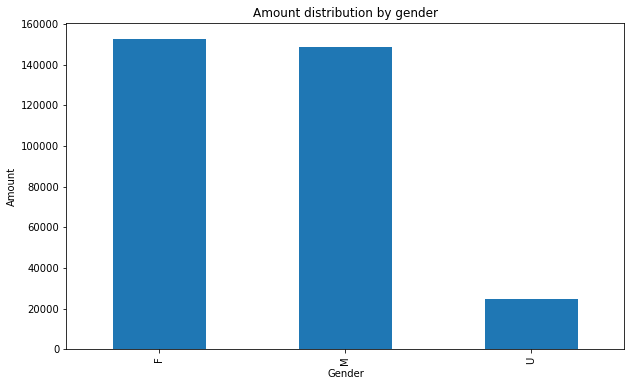

In [19]:
plt.figure(figsize=(10,6))
funded_df = df[df['event_name'] == 'Fund Project']
#filtered_df = funded_df[funded_df['category'].isin(['Sports', 'Environment'])]
df.groupby('gender')['amount'].aggregate(sum).plot(kind='bar')
plt.ylabel('Amount')
plt.xlabel('Gender')
plt.title('Amount distribution by gender')
plt.savefig("Gender.png", bbox_inches='tight',dpi=100)

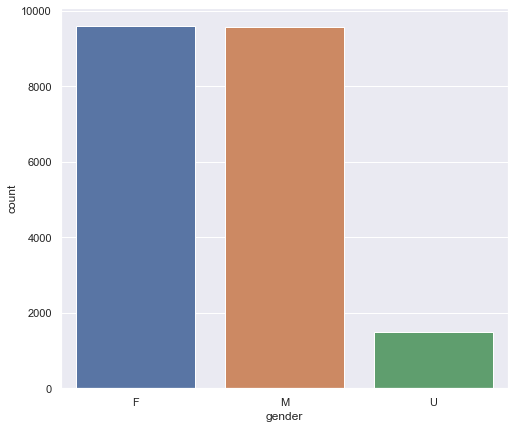

<Figure size 432x288 with 0 Axes>

In [166]:
plt.figure(figsize=(8,7))
sns.countplot('gender',data=df)
plt.show()
plt.savefig("Gender_distribution.png", bbox_inches='tight',dpi=100)


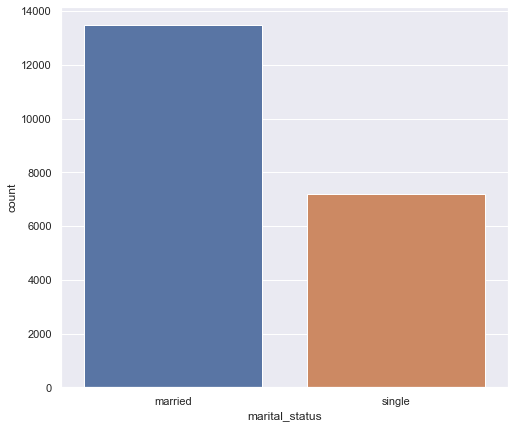

<Figure size 432x288 with 0 Axes>

In [167]:
plt.figure(figsize=(8,7))
sns.countplot('marital_status',data=df)
plt.show()
plt.savefig("marital_status_distribution.png", bbox_inches='tight',dpi=100)

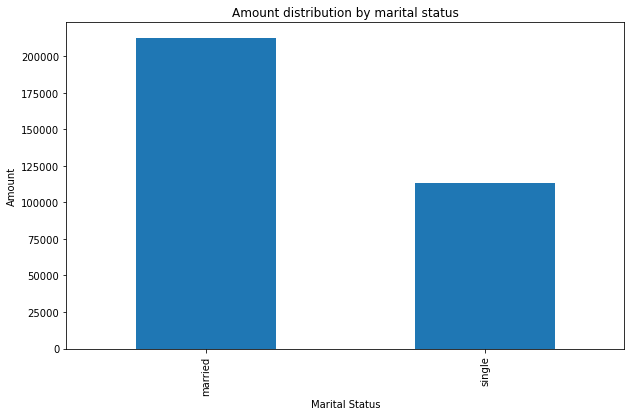

In [20]:
plt.figure(figsize=(10,6))
filtered_df.groupby('marital_status')['amount'].aggregate(sum).plot(kind='bar')
plt.ylabel('Amount')
plt.xlabel('Marital Status')
plt.title('Amount distribution by marital status')
plt.savefig("Marital Status distribution.png", bbox_inches='tight',dpi=100)


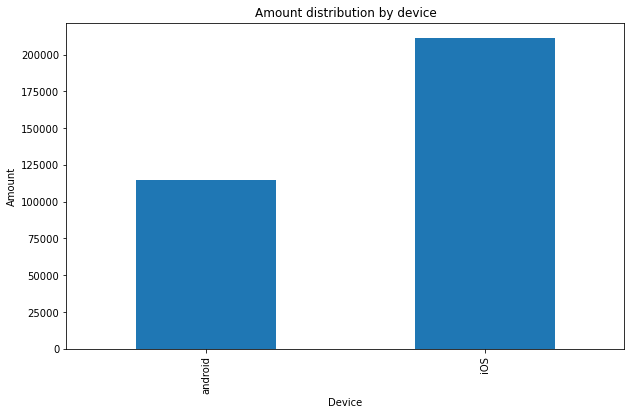

In [21]:
plt.figure(figsize=(10,6))
filtered_df.groupby('device')['amount'].aggregate(sum).plot(kind='bar')
plt.ylabel('Amount')
plt.xlabel('Device')
plt.title('Amount distribution by device')
plt.savefig("Device.png", bbox_inches='tight',dpi=100)

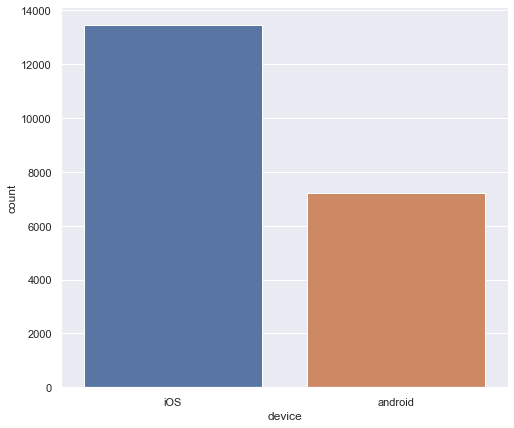

<Figure size 432x288 with 0 Axes>

In [168]:
plt.figure(figsize=(8,7))
sns.countplot('device',data=df)
plt.show()
plt.savefig("device_distribution.png", bbox_inches='tight',dpi=100)

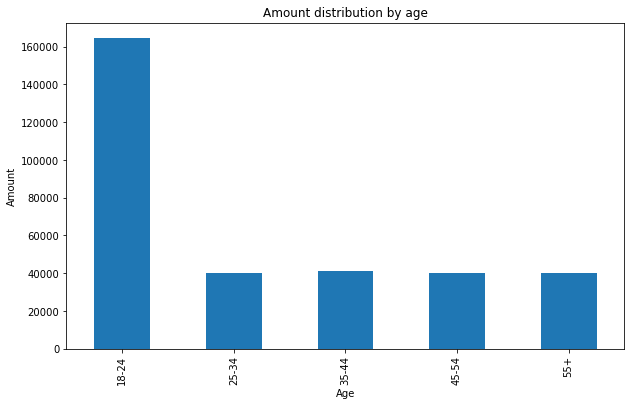

In [22]:
plt.figure(figsize=(10,6))
filtered_df.groupby('age')['amount'].aggregate(sum).plot(kind='bar')
plt.ylabel('Amount')
plt.xlabel('Age')
plt.title('Amount distribution by age')
plt.savefig("Age.png", bbox_inches='tight',dpi=100)

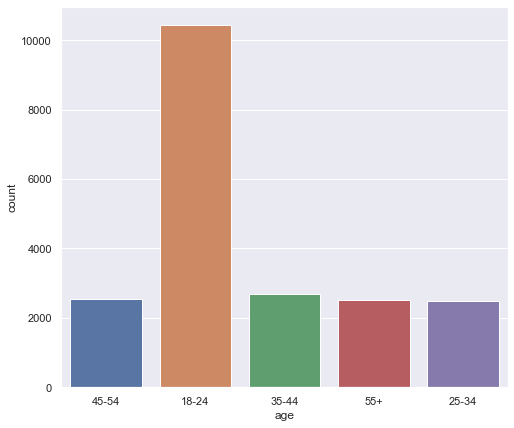

<Figure size 432x288 with 0 Axes>

In [169]:
plt.figure(figsize=(8,7))
sns.countplot('age',data=df)
plt.show()
plt.savefig("age_distribution.png", bbox_inches='tight',dpi=100)

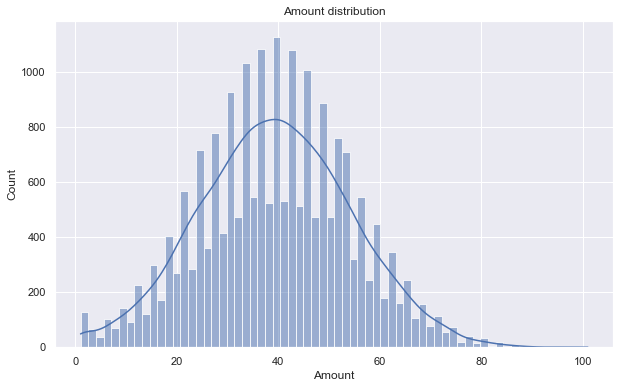

In [218]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "amount", kde = True)#, hue = "hospital_death")
plt.ylabel('Count')
plt.xlabel('Amount')
plt.title('Amount distribution')
plt.savefig("Amount.png", bbox_inches='tight',dpi=100)

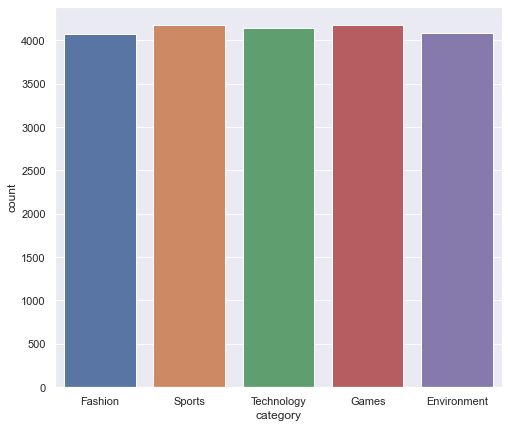

<Figure size 432x288 with 0 Axes>

In [170]:
plt.figure(figsize=(8,7))
sns.countplot('category',data=df)
plt.show()
plt.savefig("catogory_distribution.png", bbox_inches='tight',dpi=100)

# Model

In [41]:
X,y =df.drop(['amount'],axis=1),df['amount']

In [51]:
X = X[['category','gender','age','marital_status','device']]

In [52]:
y

11       61.0
16       31.0
18       39.0
25       36.0
35       40.0
         ... 
49989    37.0
49992    25.0
49994    35.0
49995    35.0
49998    37.0
Name: amount, Length: 20658, dtype: float64

In [72]:
X['is_Technology'] = X['category'].apply(lambda x:  1 if x =='Technology' else 0)
X['is_Games'] = X['category'].apply(lambda x:  1 if x =='Games' else 0)
X['is_Fashion'] = X['category'].apply(lambda x:  1 if x =='Fashion' else 0)
X['is_Sports'] = X['category'].apply(lambda x:  1 if x =='Sports' else 0)
X['is_Environment'] = X['category'].apply(lambda x:  1 if x =='Environment' else 0)


/var/folders/z2/s1b__nkd2zsc2hhyvz1vv3tw0000gn/T/ipykernel_62000/3063359307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['is_Technology'] = X['category'].apply(lambda x:  1 if x =='Technology' else 0)
/var/folders/z2/s1b__nkd2zsc2hhyvz1vv3tw0000gn/T/ipykernel_62000/3063359307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['is_Games'] = X['category'].apply(lambda x:  1 if x =='Games' else 0)
/var/folders/z2/s1b__nkd2zsc2hhyvz1vv3tw0000gn/T/ipykernel_62000/3063359307.py:3: SettingWithCopyWarni

In [73]:
X = X.drop('category',axis=1)

In [74]:
X['is_male'] = X['gender'].apply(lambda x:  1 if x =='M' else 0)
X['is_female'] = X['gender'].apply(lambda x:  1 if x =='F' else 0)


In [77]:
X = X.drop('gender',axis=1)

In [79]:
X['marital_status'].unique()

array(['married', 'single'], dtype=object)

In [80]:
X['is_married'] = X['marital_status'].apply(lambda x:  1 if x =='married' else 0)
X['is_single'] = X['marital_status'].apply(lambda x:  1 if x =='single' else 0)

In [81]:
X = X.drop('marital_status',axis=1)

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20658 entries, 11 to 49998
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             20658 non-null  object
 1   device          20658 non-null  object
 2   is_Technology   20658 non-null  int64 
 3   is_Games        20658 non-null  int64 
 4   is_Fashion      20658 non-null  int64 
 5   is_Sports       20658 non-null  int64 
 6   is_Environment  20658 non-null  int64 
 7   is_male         20658 non-null  int64 
 8   is_female       20658 non-null  int64 
 9   is_married      20658 non-null  int64 
 10  is_single       20658 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.9+ MB


In [83]:
X['device'].unique()

array(['iOS', 'android'], dtype=object)

In [84]:
X['device'] = X['device'].apply(lambda x:  1 if x =='iOS' else 0)
X['device'] = X['device'].apply(lambda x:  1 if x =='android' else 0)

In [85]:
X = X.drop('device',axis=1)

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20658 entries, 11 to 49998
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             20658 non-null  object
 1   is_Technology   20658 non-null  int64 
 2   is_Games        20658 non-null  int64 
 3   is_Fashion      20658 non-null  int64 
 4   is_Sports       20658 non-null  int64 
 5   is_Environment  20658 non-null  int64 
 6   is_male         20658 non-null  int64 
 7   is_female       20658 non-null  int64 
 8   is_married      20658 non-null  int64 
 9   is_single       20658 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 1.7+ MB


In [87]:
X['age'].unique()

array(['45-54', '18-24', '35-44', '55+', '25-34'], dtype=object)

In [88]:
X['is_45-54'] = X['age'].apply(lambda x:  1 if x =='45-54' else 0)
X['is_18-24'] = X['age'].apply(lambda x:  1 if x =='18-24' else 0)
X['is_35-44'] = X['age'].apply(lambda x:  1 if x =='35-44' else 0)
X['is_55+'] = X['age'].apply(lambda x:  1 if x =='55+' else 0)
X['is_25-34'] = X['age'].apply(lambda x:  1 if x =='25-34' else 0)

In [90]:
X = X.drop('age',axis=1)

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,test_size=.2)

In [177]:
y.head()

11    61.0
16    31.0
18    39.0
25    36.0
35    40.0
Name: amount, dtype: float64

# Linear regression

In [197]:
from sklearn.linear_model import LinearRegression

In [198]:
X_train.head()

,is_Technology,is_Games,is_Fashion,is_Sports,is_Environment,is_male,is_female,is_married,is_single,is_45-54,is_18-24,is_35-44,is_55+,is_25-34
30230,0,0,0,0,1,0,0,1,0,0,1,0,0,0
46336,0,1,0,0,0,0,1,1,0,0,1,0,0,0
41373,0,1,0,0,0,1,0,0,1,0,0,0,1,0
38903,0,0,0,0,1,0,1,1,0,0,0,0,1,0
41282,0,1,0,0,0,0,1,1,0,0,1,0,0,0


In [199]:
model = LinearRegression()

In [200]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [201]:
print(model.coef_)

[-3.85049255e+12 -3.85049255e+12 -3.85049255e+12 -3.85049255e+12
 -3.85049255e+12  3.76302719e-01  1.81537628e-01 -2.39664362e+11
 -2.39664362e+11 -2.80620680e+13 -2.80620680e+13 -2.80620680e+13
 -2.80620680e+13 -2.80620680e+13]


In [202]:
from sklearn.metrics import mean_squared_error as MSE

# Compute mse
mse = MSE(y_test, y_pred)

# Compute rmse
rmse_KNN = mse**(1/2)

print("Test set RMSE of Linear regression: {:.3f}".format(rmse_KNN))

Test set RMSE of Linear regression: 14.775


In [189]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(model, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.3f}'.format(RMSE_CV))

CV RMSE: 14.955


In [204]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
model.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = model.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.3f}'.format(RMSE_train))

Train RMSE: 14.942


# Decision tree

In [205]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import sklearn.model_selection as cv
from sklearn.tree import DecisionTreeRegressor
# Instantiate dt
dt = DecisionTreeRegressor()

# Fit dt to the training set
dt.fit(X_train, y_train)



DecisionTreeRegressor()

In [206]:
y_pred = dt.predict(X_test)

In [207]:
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.3f}".format(rmse_dt))

Test set RMSE of dt: 14.859


In [208]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.3f}'.format(RMSE_CV))

CV RMSE: 15.015


In [209]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.3f}'.format(RMSE_train))

Train RMSE: 14.870


# Random forest

In [210]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [211]:
y_pred = rf.predict(X_test)

In [212]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of rf: {:.3f}'.format(rmse_test))

Test set RMSE of rf: 14.855


In [213]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(rf, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.3f}'.format(RMSE_CV))

CV RMSE: 15.015


In [214]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.3f}'.format(RMSE_train))

Train RMSE: 14.870


# Map

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib as plt

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

In [171]:
lats2018 = df['location.latitude'].tolist()
lons2018 = df['location.longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[87.390000, 41.530000], zoom_start=11.5) #Chicago
FastMarkerCluster(data=locations).add_to(map1)
map1

# covert data

In [154]:
import pandas as pd

#with open('data.json', encoding='utf-8') as inputfile:
    #df = pd.read_json(inputfile)

df.to_csv('csvfile.csv', encoding='utf-8', index=False)